<h2>IMPORT LIBRARIES</h2>

In [2]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import math as m
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.weightstats import ztest
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae

In [3]:
#absolute error
def ae(y_true, y_pred):
    return y_pred - y_true


#percentage absolute error
def aep(y_true, y_pred):
    return (y_pred - y_true) / y_true * 100

In [4]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 18.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


<h2>DATA IMPORT</h2>

In [5]:
cdt = pd.read_excel('CleanData.xlsx')
cdt = cdt[['d00','d13','d13_den','H_drzew','Vcdrz','hw','d2','d2hw','dhwq3','dhwq2','q3','q2','d2hwq3','d2hwq2']]
cdt.head()
# d00 - diameter at the base of the tree
# d13 - "tree brast" diameter at the 1.3 m height of the tree - absolute measurement
# d13_den - "tree brast" diameter at the 1.3 m height of the tree - dendrometer measurement
# H_drzew - height of the tree
# Vcdrz - the thickness of the whole tree
# hw - height levelled of the tree
# d2 - d13^2
# d2hw - d2*hw
# q3 - tree shape parameter: (diameter at the 1/3 height of tree) / (tree breast)
# q2 - tree shape parameter: (diameter at the 1/2 height of tree) / (tree breast)
# d2hwq3 - d2hw * q3
# d2hwq2 - d2hw * q2

,d00,d13,d13_den,H_drzew,Vcdrz,hw,d2,d2hw,dhwq3,dhwq2,q3,q2,d2hwq3,d2hwq2
0,65.0,55.0,55.6,28.2,4.438204,26.050946,3025.00,78804.110284,1311.772136,1197.127784,0.915529,0.835515,71273.620000,65842.028144
1,56.0,39.0,38.4,30.4,1.981065,23.228764,1521.00,35330.950790,691.302582,640.689398,0.763093,0.707224,32700.893333,24986.886509
2,64.7,44.3,46.2,28.0,3.303146,24.327845,1962.49,47743.152108,955.999668,945.950367,0.887055,0.877730,48231.022731,41905.601240
3,65.0,54.4,53.9,28.4,4.374246,25.968109,2959.36,76848.981704,1279.243413,1233.842253,0.905553,0.873415,73406.845325,67121.018568
4,68.0,56.6,57.9,28.3,4.226675,26.265173,3203.56,84142.058193,1225.801049,1205.551325,0.824562,0.810941,73520.474748,68234.205002


<h2>DATA DESCRIPTION</h2>

In [6]:
cdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   d00      98 non-null     float64
 1   d13      98 non-null     float64
 2   d13_den  98 non-null     float64
 3   H_drzew  98 non-null     float64
 4   Vcdrz    98 non-null     float64
 5   hw       98 non-null     float64
 6   d2       98 non-null     float64
 7   d2hw     98 non-null     float64
 8   dhwq3    98 non-null     float64
 9   dhwq2    98 non-null     float64
 10  q3       98 non-null     float64
 11  q2       98 non-null     float64
 12  d2hwq3   98 non-null     float64
 13  d2hwq2   98 non-null     float64
dtypes: float64(14)
memory usage: 10.8 KB


In [7]:
cdt.describe().T

,count,mean,std,min,25%,50%,75%,max
d00,98.0,51.705102,17.208200,16.800000,36.400000,52.750000,64.650000,95.200000
d13,98.0,38.510204,13.513495,12.700000,27.300000,39.050000,48.750000,71.100000
d13_den,98.0,38.568367,13.588235,12.500000,27.200000,39.100000,48.825000,70.900000
H_drzew,98.0,22.568367,4.661060,12.200000,19.150000,23.300000,26.275000,32.900000
Vcdrz,98.0,1.887116,1.368960,0.110144,0.613897,1.653404,2.755395,5.298520
hw,98.0,22.280089,3.610722,12.204024,19.872904,23.240097,25.113131,27.848242
d2,98.0,1663.786939,1065.923112,161.290000,745.560000,1524.905000,2376.570000,5055.210000
d2hw,98.0,40534.801464,29816.428361,1968.386977,14821.756884,35438.984334,59683.233676,140778.712804
dhwq3,98.0,787.015591,373.322936,154.705141,496.239489,809.350566,1031.351006,1794.579495
dhwq2,98.0,725.967238,347.451293,146.500888,408.552634,740.108067,945.215659,1682.263450


<h2>Population Study - visualisation</h2>

### Realtions between tree breast, height of tree and thickness of tree

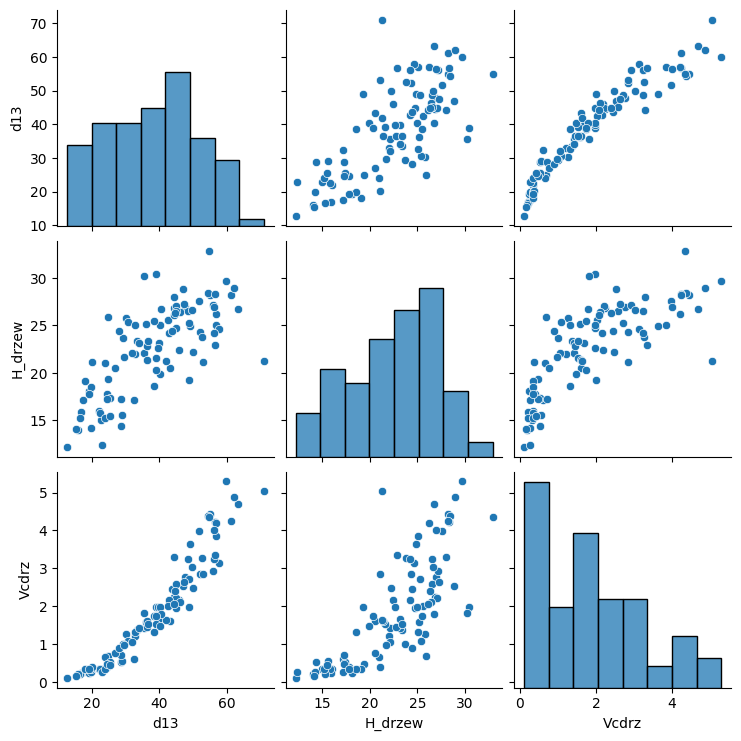

In [8]:
sns.pairplot(data=cdt[['d13','H_drzew','Vcdrz']])
plt.grid(which='both', linestyle='--',linewidth=0.5)

### Relation between create parameters and thickness of tree

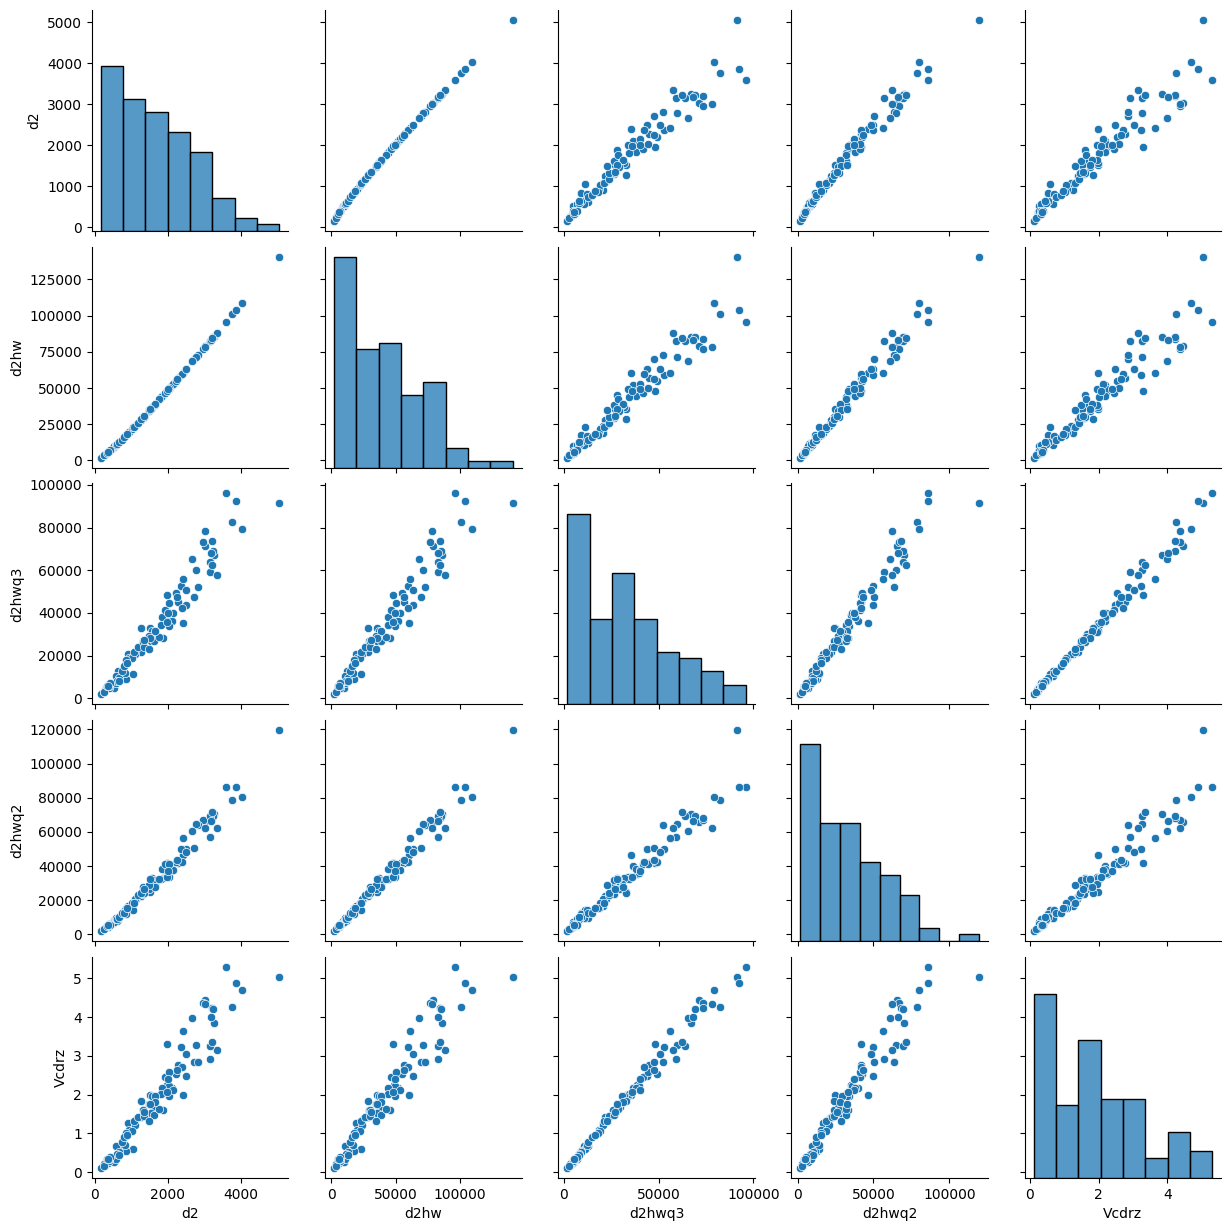

In [9]:
sns.pairplot(data=cdt[['d2', 'd2hw', 'd2hwq3', 'd2hwq2', 'Vcdrz']])

### Height leveled

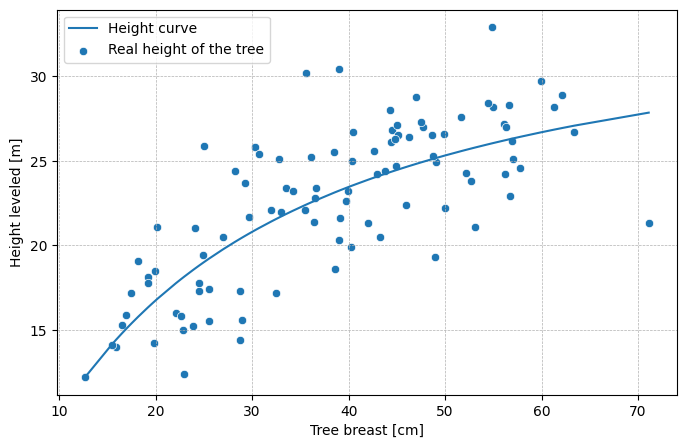

In [10]:
plt.figure(figsize=(8, 5))
plt.xlabel('Tree breast [cm]')
plt.ylabel('Height leveled [m]')
sns.lineplot(x=cdt['d13'],y=cdt['hw'], label='Height curve')
sns.scatterplot(x=cdt['d13'],y=cdt['H_drzew'], label='Real height of the tree')
plt.grid(which='both', linestyle='--',linewidth=0.5)
plt.legend()

<h2>DATA TESTING</h2>

In [11]:
test_shapiro_d13 = sp.stats.shapiro(cdt['d13'])
print("Stats: " + str(test_shapiro_d13.statistic))
print("P-value: " + str(test_shapiro_d13.pvalue))

Stats: 0.9765493869781494
P-value: 0.07682523876428604


In [12]:
test_shapiro_d13 = sp.stats.shapiro(cdt['d13_den'])
print("Stats: " + str(test_shapiro_d13.statistic))
print("P-value: " + str(test_shapiro_d13.pvalue))

Stats: 0.9760984182357788
P-value: 0.0709211528301239


In [13]:
test_shapiro_d13 = sp.stats.shapiro(cdt['H_drzew'])
print("Stats: " + str(test_shapiro_d13.statistic))
print("P-value: " + str(test_shapiro_d13.pvalue))

Stats: 0.9686501026153564
P-value: 0.0192229263484478


In [14]:
test_shapiro_d13 = sp.stats.shapiro(cdt['Vcdrz'])
print("Stats: " + str(test_shapiro_d13.statistic))
print("P-value: " + str(test_shapiro_d13.pvalue))

Stats: 0.9298033118247986
P-value: 5.75590820517391e-05


<h1> Accuracy of the dendormeter </h1>

In [15]:
dendro_ae = ae(cdt['d13'],cdt['d13_den'])
dendro_aep = aep(cdt['d13'],cdt['d13_den'])
dendro_mae = mae(cdt['d13'],cdt['d13_den'])
dendro_maep = mape(cdt['d13'],cdt['d13_den'])
pd.DataFrame(data=[dendro_ae,dendro_aep], index=['Absolute error','Absolute error percentage']).T

,Absolute error,Absolute error percentage
0,0.6,1.090909
1,-0.6,-1.538462
2,1.9,4.288939
3,-0.5,-0.919118
4,1.3,2.296820
...,...,...
93,0.3,0.669643
94,0.3,0.769231
95,-0.2,-0.546448
96,-0.6,-1.058201


In [16]:
print(f'min:{min(dendro_aep)} max: {max(dendro_aep)}')

min:-3.0303030303030374 max: 4.288939051918749


In [17]:
pd.DataFrame(data=[dendro_mae,dendro_maep],index=['MAE','MAPE']).T

,MAE,MAPE
0,0.313265,0.008504


<Axes: xlabel='Percentage error [%]', ylabel='Count [pcs.]'>

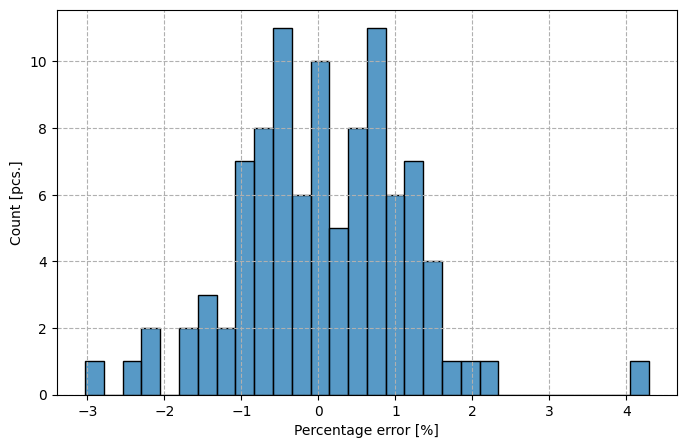

In [83]:
plt.figure(figsize=(8, 5))
plt.xlabel('Percentage error [%]')
plt.ylabel('Count [pcs.]')
plt.grid(which='both', linestyle='--',in_layout=False)
#plt.hist(x=dendro_aep,bins=30)
sns.histplot(data=dendro_aep,bins=30)

<Axes: xlabel='Absolute Error Percentage [%]', ylabel='Count'>

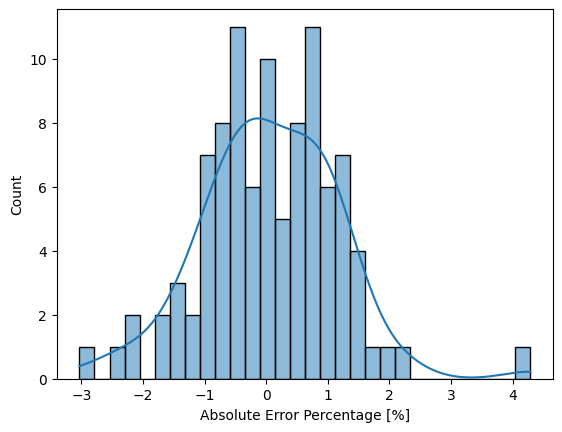

In [19]:
plt.xlabel('Absolute Error Percentage [%]')
sns.histplot(data=dendro_aep,kde=True,bins=30)

<Axes: ylabel='Absolute error [cm]'>

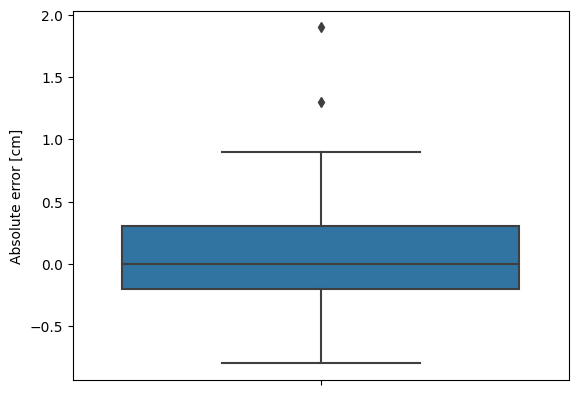

In [20]:
plt.ylabel('Absolute error [cm]')
sns.boxplot(y=dendro_ae)

<h1>Linear regression - SciPy

### First model: d^2

In [21]:
X = cdt['d2']
Y = cdt['Vcdrz']
regress = sp.stats.linregress(X, Y)

print("Slope = " + str(regress.slope))
print("Intercept = " + str(regress.intercept))
print("R2 = " + str(regress.rvalue ** 2))
print("Pearson = " + str(regress.rvalue))
print("P-value = " + str(regress.pvalue))
print("Standard error = " + str(regress.stderr))
print("Intercept standard error = " + str(regress.intercept_stderr))

Slope = 0.001236709693317407
Intercept = -0.1705056715146842
R2 = 0.9272691177536688
Pearson = 0.9629481386625496
P-value = 1.9419084419998444e-56
Standard error = 3.534993976471847e-05
Intercept standard error = 0.06974593516080715


In [22]:
Y_pred = regress.intercept + regress.slope * X
u = Y - Y_pred
u2 = u**2
absolute_error = ae(Y, Y_pred)
absolute_error_percentage = aep(Y, Y_pred)
pearson = sp.stats.pearsonr(cdt['d2'], Y_pred)
t = sp.stats.ttest_rel(Y_pred, Y)
anova = sp.stats.f_oneway(Y, Y_pred)
print('S2u = ' + str(sp.stats.variation(u)))
print('Su = ' + str(sp.stats.tstd(u)))
print('Vu = ' + str(sp.stats.tstd(u) / sp.stats.tmean(u) * 100))
print('MAPE = ' + str(mape(Y, Y_pred)))
print('MAE = ' + str(mae(Y, Y_pred)))
print('MAX AEP = ' + str(max(absolute_error_percentage)))
print('MIN AEP = ' + str(min(absolute_error_percentage)))
print('STD AEP = ' + str(sp.stats.tstd(absolute_error_percentage)))

S2u = 2437739012283502.5
Su = 0.3691902077001436
Vu = 2.450272457429562e+17
MAPE = 0.18149822892876233
MAE = 0.2542126416655934
MAX AEP = 90.12760831301725
MIN AEP = -73.70423881356832
STD AEP = 24.979422794694525


In [23]:
std = np.sqrt((1/(98-1-1)*sum(u2)))
matrix = cdt['d2']
matrixT = matrix.T
a = np.multiply(np.multiply(matrix,matrixT)**(-1),matrixT*regress.slope)
d_2 = (std**2)*(np.multiply(matrixT,matrix)**-1)
tst = a/np.sqrt(d_2)

In [24]:
#Parameter significance test

data = pd.DataFrame(data=cdt[['d2', 'Vcdrz']])
model = ols("Vcdrz ~ d2", data).fit()

print(model.summary())

print("\nRetrieving manually the parameter estimates:")
print(model._results.params)

anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)

plt.show()

                            OLS Regression Results                            
Dep. Variable:                  Vcdrz   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1224.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           1.94e-56
Time:                        15:21:25   Log-Likelihood:                -40.902
No. Observations:                  98   AIC:                             85.80
Df Residuals:                      96   BIC:                             90.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1705      0.070     -2.445      0.0

In [25]:
d2 = {"a": regress.slope, "b": regress.intercept, "a*d": "NaN", "a*h": "NaN", "R2": regress.rvalue ** 2,
      "Pearson": regress.rvalue, "Pvalue": regress.pvalue, 'Su': sp.stats.tstd(u),
      'MAX AEP': max(absolute_error_percentage), 'MIN AEP': min(absolute_error_percentage),
      'STD AEP': sp.stats.tstd(absolute_error_percentage),
      'MAE': mae(Y, Y_pred), 'MAPE': mape(Y, Y_pred),
      'test-t': t.statistic, 'test-t p-value': t.pvalue,
      'anova f-stat': anova.statistic, 'anova p-value': anova.pvalue}

d2_sum = {'predictions':Y_pred,'u':u,'absolute_error':absolute_error,'absolute_error_percentage':absolute_error_percentage}

pd.DataFrame(d2, index=['value']).T

,value
a,0.001237
b,-0.170506
a*d,NaN
a*h,NaN
R2,0.927269
Pearson,0.962948
Pvalue,0.0
Su,0.36919
MAX AEP,90.127608
MIN AEP,-73.704239


Text(42.12500000000001, 0.5, 'V [m3]')

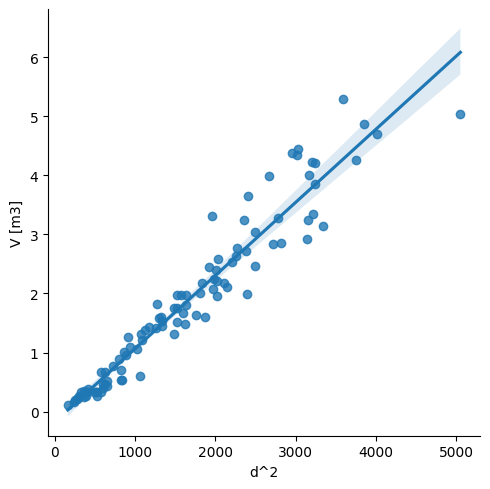

In [26]:
data = pd.DataFrame(data=[cdt['d2'],cdt['Vcdrz']]).T
sns.lmplot(data=data,x='d2',y='Vcdrz',legend=True)
plt.xlabel('d^2')
plt.ylabel('V [m3]')

Text(0.5, 9.444444444444438, 'Absolute error percentage [%]')

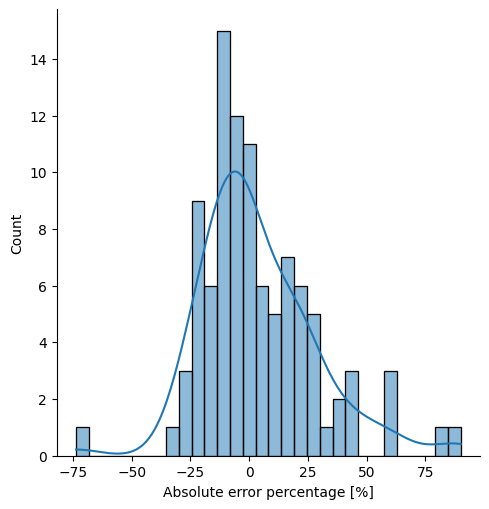

In [27]:
sns.displot(d2_sum['absolute_error_percentage'], kde=True, bins = 30)
plt.xlabel('Absolute error percentage [%]')

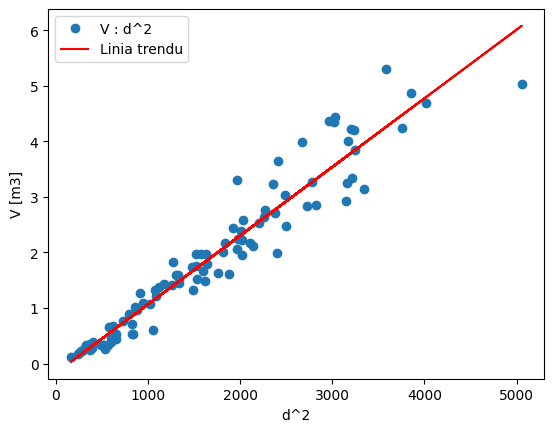

In [28]:
plt.plot(X, Y, 'o', label='V : d^2')
plt.xlabel('d^2')
plt.ylabel('V [m3]')
plt.plot(X, regress.intercept + regress.slope * X, 'r', label='Linia trendu')
plt.legend()
plt.show()

### Second model: d2*hw

In [29]:
X = cdt['d2hw']
Y = cdt['Vcdrz']
regress = sp.stats.linregress(X, Y)

print("Slope = " + str(regress.slope))
print("Intercept = " + str(regress.intercept))
print("R2 = " + str(regress.rvalue ** 2))
print("Pearson = " + str(regress.rvalue))
print("P-value = " + str(regress.pvalue))
print("Standard error = " + str(regress.stderr))
print("Intercept standard error = " + str(regress.intercept_stderr))

Slope = 4.4116961966200194e-05
Intercept = 0.09884346877431383
R2 = 0.9232959764231478
Pearson = 0.9608829150438402
P-value = 2.4998077993756354e-55
Standard error = 1.297802429468484e-06
Intercept standard error = 0.06518816392367908


In [30]:
Y_pred = regress.intercept + regress.slope * X
u = Y - Y_pred
absolute_error = ae(Y, Y_pred)
absolute_error_percentage = aep(Y, Y_pred)
t = sp.stats.ttest_rel(Y_pred, Y)
z = ztest(Y, Y_pred, value=sp.stats.tmean(Y))
anova = sp.stats.f_oneway(Y, Y_pred)
print('S2u = ' + str(sp.stats.variation(u)))
print('Su = ' + str(sp.stats.tstd(u)))
print('Vu = ' + str(sp.stats.tstd(u) / sp.stats.tmean(u) * 100))
print('MAPE = ' + str(mape(Y, Y_pred)))
print('MAE = ' + str(mae(Y, Y_pred)))
print('MAX AEP = ' + str(max(absolute_error_percentage)))
print('MIN AEP = ' + str(min(absolute_error_percentage)))
print('STD AEP = ' + str(sp.stats.tstd(absolute_error_percentage)))

S2u = -4214648906200952.0
Su = 0.3791401856997297
Vu = -4.236318195082819e+17
MAPE = 0.19622903477562598
MAE = 0.26363574151855307
MAX AEP = 99.49306484409871
MIN AEP = -33.24163628659839
STD AEP = 25.938705651116756


In [31]:
std = np.sqrt((1/(98-1-1)*sum(u2)))
matrix = cdt['d2hw']
matrixT = matrix.T
a = np.multiply(np.multiply(matrix,matrixT)**(-1),matrixT*regress.slope)
d_2 = (std**2)*(np.multiply(matrixT,matrix)**-1)
tst = a/np.sqrt(d_2)
print(tst[0])

0.00011887900840557975


In [32]:
data = pd.DataFrame(data=cdt[['d2hw', 'Vcdrz']])
model = ols("Vcdrz ~ d2hw", data).fit()

print(model.summary())

print("\nRetrieving manually the parameter estimates:")
print(model._results.params)

anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)

plt.show()

                            OLS Regression Results                            
Dep. Variable:                  Vcdrz   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     1156.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           2.50e-55
Time:                        15:21:27   Log-Likelihood:                -43.508
No. Observations:                  98   AIC:                             91.02
Df Residuals:                      96   BIC:                             96.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0988      0.065      1.516      0.1

In [33]:
d2hw = {"a": regress.slope, "b": regress.intercept, "a*d": "NaN", "a*h": "NaN", "R2": regress.rvalue ** 2,
        "Pearson": regress.rvalue, "Pvalue": regress.pvalue, 'Su': sp.stats.tstd(u),
        'MAX AEP': max(absolute_error_percentage), 'MIN AEP': min(absolute_error_percentage),
        'STD AEP': sp.stats.tstd(absolute_error_percentage),
        'MAE': mae(Y, Y_pred), 'MAPE': mape(Y, Y_pred),
        'test-t': t.statistic, 'test-t p-value': t.pvalue,
        'anova f-stat': anova.statistic, 'anova p-value': anova.pvalue}

d2hw_sum = {'predictions':Y_pred,'u':u,'absolute_error':absolute_error,'absolute_error_percentage':absolute_error_percentage}

pd.DataFrame(d2hw, index=['value']).T

,value
a,0.000044
b,0.098843
a*d,NaN
a*h,NaN
R2,0.923296
Pearson,0.960883
Pvalue,0.0
Su,0.37914
MAX AEP,99.493065
MIN AEP,-33.241636


Text(42.12500000000001, 0.5, 'V [m3]')

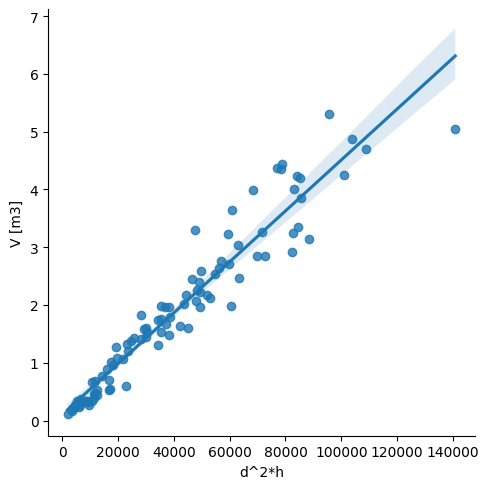

In [34]:
data = pd.DataFrame(data=[cdt['d2hw'],cdt['Vcdrz']]).T
sns.lmplot(data=data,x='d2hw',y='Vcdrz',legend=True)
plt.xlabel('d^2*h')
plt.ylabel('V [m3]')

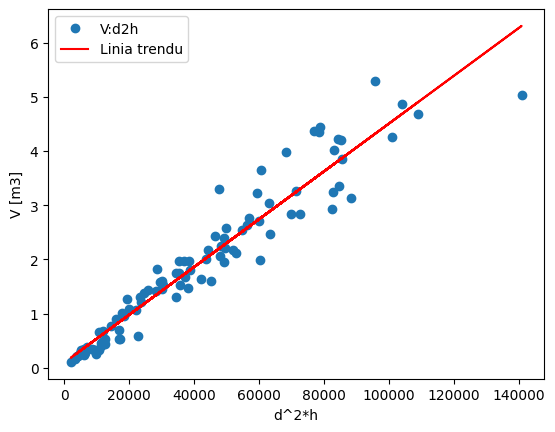

In [35]:
plt.plot(X, Y, 'o', label='V:d2h')
plt.xlabel('d^2*h')
plt.ylabel('V [m3]')
plt.plot(X, regress.intercept + regress.slope * X, 'r', label='Linia trendu')
plt.legend()
plt.show()

### Third model: d^2 *hw * q3

In [36]:
X = cdt['d2hwq3']
Y = cdt['Vcdrz']
regress = sp.stats.linregress(X, Y)

print("Slope = " + str(regress.slope))
print("Intercept = " + str(regress.intercept))
print("R2 = " + str(regress.rvalue ** 2))
print("Pearson = " + str(regress.rvalue))
print("P-value = " + str(regress.pvalue))
print("Standard error = " + str(regress.stderr))
print("Intercept standard error = " + str(regress.intercept_stderr))

Slope = 5.636897392698105e-05
Intercept = 0.04018049857159056
R2 = 0.9872944029161933
Pearson = 0.9936268932130377
P-value = 8.019678023354013e-93
Standard error = 6.52647554482078e-07
Intercept standard error = 0.026509959235394457


In [37]:
std = np.sqrt((1/(98-1-1)*sum(u2)))
matrix = cdt['d2hwq3']
matrixT = matrix.T
a = np.multiply(np.multiply(matrix,matrixT)**(-1),matrixT*regress.slope)
d_2 = (std**2)*(np.multiply(matrixT,matrix)**-1)
tst = a/np.sqrt(d_2)
print(tst[0])

0.00015189368049444254


In [38]:
data = pd.DataFrame(data=cdt[['d2hwq3', 'Vcdrz']])
model = ols("Vcdrz ~ d2hwq3", data).fit()

print(model.summary())

print("\nRetrieving manually the parameter estimates:")
print(model._results.params)

anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)

plt.show()

                            OLS Regression Results                            
Dep. Variable:                  Vcdrz   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     7460.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           8.02e-93
Time:                        15:21:28   Log-Likelihood:                 44.589
No. Observations:                  98   AIC:                            -85.18
Df Residuals:                      96   BIC:                            -80.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0402      0.027      1.516      0.1

In [39]:
Y_pred = regress.intercept + regress.slope * X
u = Y - Y_pred
absolute_error = ae(Y, Y_pred)
absolute_error_percentage = aep(Y, Y_pred)
t = sp.stats.ttest_rel(Y_pred, Y)
anova = sp.stats.f_oneway(Y, Y_pred)
print('S2u = ' + str(sp.stats.variation(u)))
print('Su = ' + str(sp.stats.tstd(u)))
print('Vu = ' + str(sp.stats.tstd(u) / sp.stats.tmean(u) * 100))
print('MAPE = ' + str(mape(Y, Y_pred)))
print('MAE = ' + str(mae(Y, Y_pred)))
print('MAX AEP = ' + str(max(absolute_error_percentage)))
print('MIN AEP = ' + str(min(absolute_error_percentage)))
print('STD AEP = ' + str(sp.stats.tstd(absolute_error_percentage)))

S2u = 1.3551175199950474e+16
Su = 0.1543079440996171
Vu = 1.362084751112792e+18
MAPE = 0.07082477583027388
MAE = 0.1025978397622577
MAX AEP = 33.453767383068346
MIN AEP = -16.476181523709304
STD AEP = 9.562010938315625


In [40]:
d2hwq3 = {"a": regress.slope, "b": regress.intercept, "a*d": "NaN", "a*h": "NaN", "R2": regress.rvalue ** 2,
          "Pearson": regress.rvalue, "Pvalue": regress.pvalue, 'Su': sp.stats.tstd(u),
          'MAX AEP': max(absolute_error_percentage), 'MIN AEP': min(absolute_error_percentage),
          'STD AEP': sp.stats.tstd(absolute_error_percentage),
          'MAE': mae(Y, Y_pred), 'MAPE': mape(Y, Y_pred),
          'test-t': t.statistic, 'test-t p-value': t.pvalue,
          'anova f-stat': anova.statistic, 'anova p-value': anova.pvalue}

d2hwq3_sum = {'predictions':Y_pred,'u':u,'absolute_error':absolute_error,'absolute_error_percentage':absolute_error_percentage}

pd.DataFrame(d2hwq3, index=['value']).T

,value
a,0.000056
b,0.04018
a*d,NaN
a*h,NaN
R2,0.987294
Pearson,0.993627
Pvalue,0.0
Su,0.154308
MAX AEP,33.453767
MIN AEP,-16.476182


Text(42.12500000000001, 0.5, 'V [m3]')

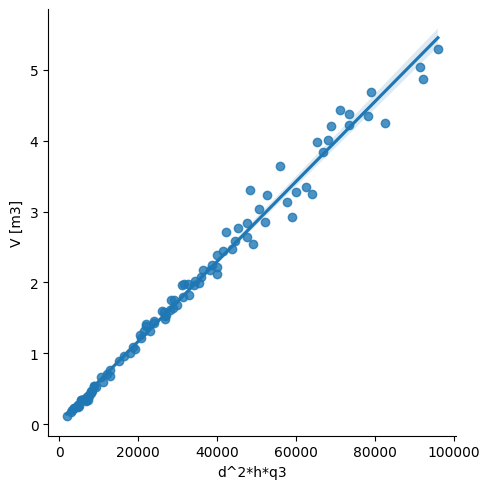

In [41]:
data = pd.DataFrame(data=[cdt['d2hwq3'],cdt['Vcdrz']]).T
sns.lmplot(data=data,x='d2hwq3',y='Vcdrz',legend=True)
plt.xlabel('d^2*h*q3')
plt.ylabel('V [m3]')

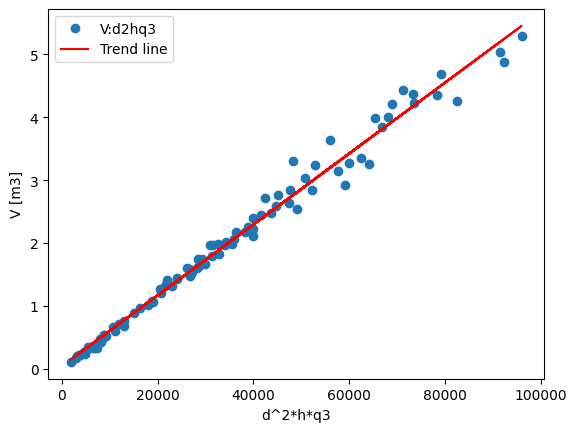

In [42]:
plt.plot(X, Y, 'o', label='V:d2hq3')
plt.xlabel('d^2*h*q3')
plt.ylabel('V [m3]')
plt.plot(X, regress.intercept + regress.slope * X, 'r', label='Trend line')
plt.legend()
plt.show()

### Fourth model: d^2 *hw * q2

In [43]:
X = cdt['d2hwq2']
Y = cdt['Vcdrz']
regress = sp.stats.linregress(X, Y)

print("Slope = " + str(regress.slope))
print("Intercept = " + str(regress.intercept))
print("R2 = " + str(regress.rvalue ** 2))
print("Pearson = " + str(regress.rvalue))
print("P-value = " + str(regress.pvalue))
print("Standard error = " + str(regress.stderr))
print("Intercept standard error = " + str(regress.intercept_stderr))

Slope = 5.45471199352316e-05
Intercept = 0.11361926871801176
R2 = 0.9388748011822196
Pearson = 0.9689555207450028
P-value = 4.588336550566234e-60
Standard error = 1.4205041580163177e-06
Intercept standard error = 0.05756845014003711


In [44]:
Y_pred = regress.intercept + regress.slope * X
u = Y - Y_pred
absolute_error = ae(Y, Y_pred)
absolute_error_percentage = aep(Y, Y_pred)
t = sp.stats.ttest_rel(Y_pred, Y)
anova = sp.stats.f_oneway(Y, Y_pred)
print('S2u = ' + str(sp.stats.variation(u)))
print('Su = ' + str(sp.stats.tstd(u)))
print('Vu = ' + str(sp.stats.tstd(u) / sp.stats.tmean(u) * 100))
print('MAPE = ' + str(mape(Y, Y_pred)))
print('MAE = ' + str(mae(Y, Y_pred)))
print('MAX AEP = ' + str(max(absolute_error_percentage)))
print('MIN AEP = ' + str(min(absolute_error_percentage)))
print('STD AEP = ' + str(sp.stats.tstd(absolute_error_percentage)))

S2u = 1442853850258056.2
Su = 0.33845496382994394
Vu = 1.4502721708801027e+17
MAPE = 0.19116603777821506
MAE = 0.23649302768503064
MAX AEP = 95.29642282422824
MIN AEP = -27.358674269173598
STD AEP = 25.737798385808055


In [45]:
std = np.sqrt((1/(98-1-1)*sum(u2)))
matrix = cdt['d2hwq2']
matrixT = matrix.T
a = np.multiply(np.multiply(matrix,matrixT)**(-1),matrixT*regress.slope)
d_2 = (std**2)*(np.multiply(matrixT,matrix)**-1)
tst = a/np.sqrt(d_2)
print(tst[0])

0.00014698445315089033


In [46]:
data = pd.DataFrame(data=cdt[['d2hwq2', 'Vcdrz']])
model = ols("Vcdrz ~ d2hwq2", data).fit()

print(model.summary())

print("\nRetrieving manually the parameter estimates:")
print(model._results.params)

anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)

plt.show()

                            OLS Regression Results                            
Dep. Variable:                  Vcdrz   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     1475.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           4.59e-60
Time:                        15:21:30   Log-Likelihood:                -32.384
No. Observations:                  98   AIC:                             68.77
Df Residuals:                      96   BIC:                             73.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1136      0.058      1.974      0.0

In [47]:
d2hwq2 = {"a": regress.slope, "b": regress.intercept, "a*d": "NaN", "a*h": "NaN", "R2": regress.rvalue ** 2,
          "Pearson": regress.rvalue, "Pvalue": regress.pvalue, 'Su': sp.stats.tstd(u),
          'MAX AEP': max(absolute_error_percentage), 'MIN AEP': min(absolute_error_percentage),
          'STD AEP': sp.stats.tstd(absolute_error_percentage),
          'MAE': mae(Y, Y_pred), 'MAPE': mape(Y, Y_pred),
          'test-t': t.statistic, 'test-t p-value': t.pvalue,
          'anova f-stat': anova.statistic, 'anova p-value': anova.pvalue}

d2hwq2_sum = {'predictions':Y_pred,'u':u,'absolute_error':absolute_error,'absolute_error_percentage':absolute_error_percentage}          

pd.DataFrame(d2hwq2, index=['value']).T

,value
a,0.000055
b,0.113619
a*d,NaN
a*h,NaN
R2,0.938875
Pearson,0.968956
Pvalue,0.0
Su,0.338455
MAX AEP,95.296423
MIN AEP,-27.358674


Text(42.12500000000001, 0.5, 'V [m3]')

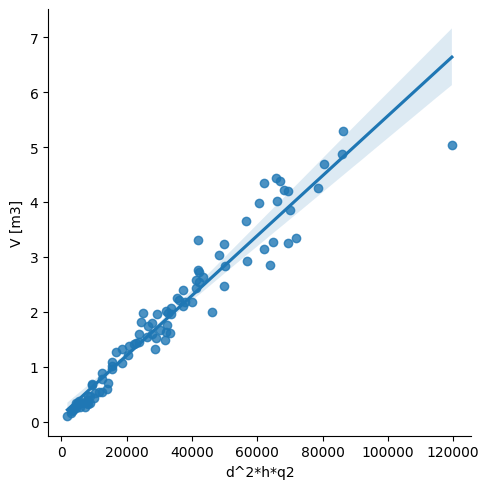

In [48]:
data = pd.DataFrame(data=[cdt['d2hwq2'],cdt['Vcdrz']]).T
sns.lmplot(data=data,x='d2hwq2',y='Vcdrz',legend=True)
plt.xlabel('d^2*h*q2')
plt.ylabel('V [m3]')

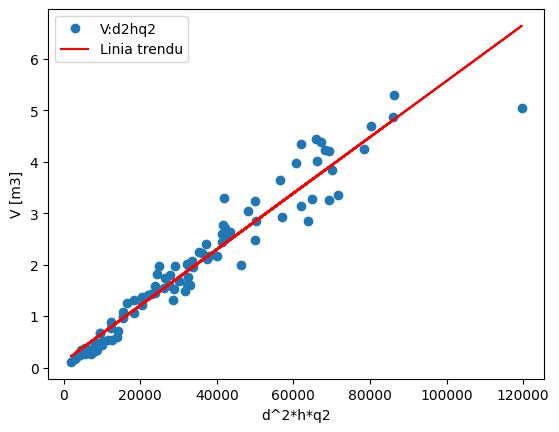

In [49]:
plt.plot(X, Y, 'o', label='V:d2hq2')
plt.xlabel('d^2*h*q2')
plt.ylabel('V [m3]')
plt.plot(X, regress.intercept + regress.slope * X, 'r', label='Linia trendu')
plt.legend()
plt.show()

# Power regression

### Fifth model: b + (d * h * q3)^a

In [50]:
## y'
y = []
for i in cdt['Vcdrz']:
    y.append(m.log(i))

x = []
for i in cdt['dhwq3']:
    x.append(m.log(i))

dt = pd.DataFrame(data=[x, y]).T

regress = sp.stats.linregress(dt[0], dt[1])

print("Slope = " + str(regress.slope))
print("Intercept = " + str(regress.intercept))
print("R2 = " + str(regress.rvalue ** 2))
print("Pearson = " + str(regress.rvalue))
print("P-value = " + str(regress.pvalue))
print("Standard error = " + str(regress.stderr))
print("Intercept standard error = " + str(regress.intercept_stderr))

Slope = 1.685970368037576
Intercept = -10.739334090830939
R2 = 0.9624276917910618
Pearson = 0.9810339911496756
P-value = 3.2469429455274406e-70
Standard error = 0.03399884814766032
Intercept standard error = 0.22290692087179972


In [51]:
Y_pred = m.exp(regress.intercept) * cdt['dhwq3'] ** regress.slope
Y_pred = list(Y_pred)
u = cdt['Vcdrz'] - Y_pred
absolute_error = ae(cdt['Vcdrz'], Y_pred)
absolute_error_percentage = aep(cdt['Vcdrz'], Y_pred)
t = sp.stats.ttest_rel(Y_pred, cdt['Vcdrz'])
anova = sp.stats.f_oneway(cdt['Vcdrz'], Y_pred)
pearson = sp.stats.pearsonr(cdt['Vcdrz'], Y_pred)
r2 = pearson[0] ** 2
print('S2u = ' + str(sp.stats.variation(u)))
print('Su = ' + str(sp.stats.tstd(u)))
print('Vu = ' + str(sp.stats.tstd(u) / sp.stats.tmean(u) * 100))
print('MAPE = ' + str(mape(cdt['Vcdrz'], Y_pred)))
print('MAE = ' + str(mae(cdt['Vcdrz'], Y_pred)))
print('MAX AEP = ' + str(max(absolute_error_percentage)))
print('MIN AEP = ' + str(min(absolute_error_percentage)))
print('STD AEP = ' + str(sp.stats.tstd(absolute_error_percentage)))

S2u = 19.308441559863034
Su = 0.3728335657064947
Vu = 1940.7714407336457
MAPE = 0.15895273319732361
MAE = 0.2596866477135531
MAX AEP = 45.29490417604781
MIN AEP = -32.909013390033195
STD AEP = 19.49167431199709


In [52]:
dhwq3 = {"a": regress.slope, "b": m.exp(regress.intercept), "a*d": "NaN", "a*h": "NaN", "R2": pearson[0] ** 2,
         "Pearson": pearson[0], "Pvalue": pearson[1], 'Su': sp.stats.tstd(u),
         'MAX AEP': max(absolute_error_percentage), 'MIN AEP': min(absolute_error_percentage),
         'STD AEP': sp.stats.tstd(absolute_error_percentage),
         'MAE': mae(cdt['Vcdrz'], Y_pred), 'MAPE': mape(cdt['Vcdrz'], Y_pred),
         'test-t': t.statistic, 'test-t p-value': t.pvalue,
         'anova f-stat': anova.statistic, 'anova p-value': anova.pvalue}

dhwq3_sum = {'predictions':Y_pred,'u':u,'absolute_error':absolute_error,'absolute_error_percentage':absolute_error_percentage}

pd.DataFrame(dhwq3, index=['value']).T

,value
a,1.68597
b,0.000022
a*d,NaN
a*h,NaN
R2,0.927461
Pearson,0.963048
Pvalue,0.0
Su,0.372834
MAX AEP,45.294904
MIN AEP,-32.909013


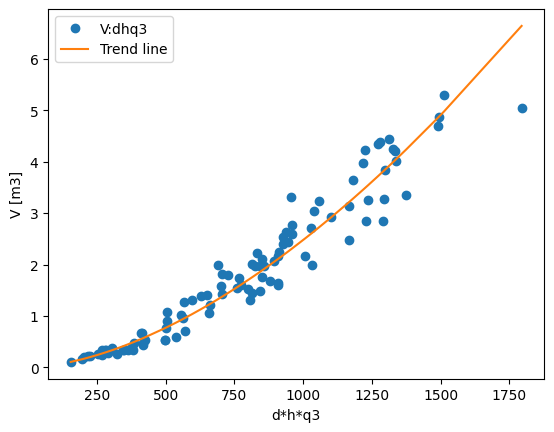

In [53]:
plt.plot(cdt['dhwq3'], cdt['Vcdrz'], 'o', label='V:dhq3')
#plt.plot(cdt['dhwq3'], Y_pred, '-')
plt.xlabel('d*h*q3')
plt.ylabel('V [m3]')
sns.lineplot(x=cdt['dhwq3'],y=Y_pred, label='Trend line')
#plt.plot(cdt['dhwq3'], m.exp(regress.intercept) * cdt['dhwq3'] ** regress.slope, 'r--', label='Linia trendu')
plt.legend()
plt.show()

Text(0.5, 9.444444444444438, 'Absolute error percentage [%]')

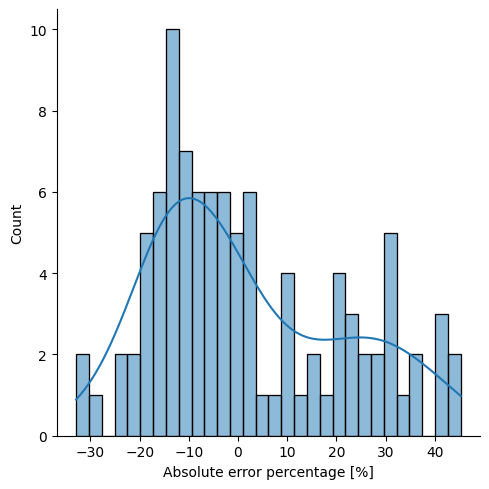

In [54]:
sns.displot(dhwq3_sum['absolute_error_percentage'], kde=True, bins = 30)
plt.xlabel('Absolute error percentage [%]')

### Sixth model: b * (d * h * q2)^a

In [55]:
y = []
for i in cdt['Vcdrz']:
    y.append(m.log(i))

x = []
for i in cdt['dhwq2']:
    x.append(m.log(i))

dt = pd.DataFrame(data=[x, y]).T

regress = sp.stats.linregress(dt[0], dt[1])

print("Slope = " + str(regress.slope))
print("Intercept = " + str(regress.intercept))
print("R2 = " + str(regress.rvalue ** 2))
print("Pearson = " + str(regress.rvalue))
print("P-value = " + str(regress.pvalue))
print("Standard error = " + str(regress.stderr))
print("Intercept standard error = " + str(regress.intercept_stderr))

Slope = 1.6971918260169925
Intercept = -10.674881426590128
R2 = 0.9696369778528623
Pearson = 0.9847014663606743
P-value = 1.1716288826010916e-74
Standard error = 0.03065231136624834
Intercept standard error = 0.19848284010125822


In [56]:
Y_pred = m.exp(regress.intercept) * cdt['dhwq2'] ** regress.slope
u = cdt['Vcdrz'] - Y_pred
absolute_error = ae(cdt['Vcdrz'], Y_pred)
absolute_error_percentage = aep(cdt['Vcdrz'], Y_pred)
t = sp.stats.ttest_rel(Y_pred, cdt['Vcdrz'])
anova = sp.stats.f_oneway(cdt['Vcdrz'], Y_pred)
pearson = sp.stats.pearsonr(cdt['Vcdrz'], Y_pred)
r2 = pearson[0] ** 2
print('S2u = ' + str(sp.stats.variation(u)))
print('Su = ' + str(sp.stats.tstd(u)))
print('Vu = ' + str(sp.stats.tstd(u) / sp.stats.tmean(u) * 100))
print('MAPE = ' + str(mape(cdt['Vcdrz'], Y_pred)))
print('MAE = ' + str(mae(cdt['Vcdrz'], Y_pred)))
print('MAX AEP = ' + str(max(absolute_error_percentage)))
print('MIN AEP = ' + str(min(absolute_error_percentage)))
print('STD AEP = ' + str(sp.stats.tstd(absolute_error_percentage)))

S2u = 54.08421008539171
Su = 0.3589522050641284
Vu = 5436.227983648383
MAPE = 0.13745309521076032
MAE = 0.2312939868893418
MAX AEP = 57.19374983394734
MIN AEP = -32.3171762890116
STD AEP = 17.933775513302628


In [57]:
dhwq2 = {"a": regress.slope, "b": m.exp(regress.intercept), "a*d": "NaN", "a*h": "NaN", "R2": pearson[0] ** 2,
         "Pearson": pearson[0], "Pvalue": pearson[1], 'Su': sp.stats.tstd(u),
         'MAX AEP': max(absolute_error_percentage), 'MIN AEP': min(absolute_error_percentage),
         'STD AEP': sp.stats.tstd(absolute_error_percentage),
         'MAE': mae(cdt['Vcdrz'], Y_pred), 'MAPE': mape(cdt['Vcdrz'], Y_pred),
         'test-t': t.statistic, 'test-t p-value': t.pvalue,
         'anova f-stat': anova.statistic, 'anova p-value': anova.pvalue}

dhwq2_sum = {'predictions':Y_pred,'u':u,'absolute_error':absolute_error,'absolute_error_percentage':absolute_error_percentage}

pd.DataFrame(dhwq2, index=['value']).T

,value
a,1.697192
b,0.000023
a*d,NaN
a*h,NaN
R2,0.935207
Pearson,0.967061
Pvalue,0.0
Su,0.358952
MAX AEP,57.19375
MIN AEP,-32.317176


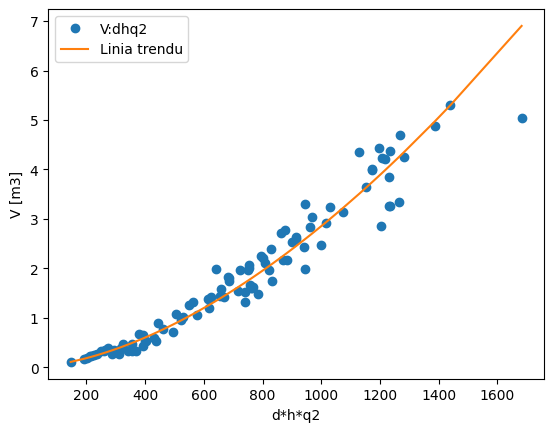

In [58]:
plt.plot(cdt['dhwq2'], cdt['Vcdrz'], 'o', label='V:dhq2')
#plt.plot(cdt['dhwq3'], Y_pred, '-')
plt.xlabel('d*h*q2')
plt.ylabel('V [m3]')
sns.lineplot(x=cdt['dhwq2'],y=Y_pred, label='Linia trendu')
#plt.plot(cdt['dhwq3'], m.exp(regress.intercept) * cdt['dhwq3'] ** regress.slope, 'r--', label='Linia trendu')
plt.legend()
plt.show()

# Multiple Regression

### Seventh model: a * d2 + b * hw + c

In [59]:
data = pd.DataFrame(data=cdt[['d2', 'hw', 'Vcdrz']])
model = ols("Vcdrz ~ d2 + hw", data).fit()

print(model.summary())

print("\nRetrieving manually the parameter estimates:")
print(model._results.params)

anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)

plt.show()

                            OLS Regression Results                            
Dep. Variable:                  Vcdrz   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     607.7
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           7.36e-55
Time:                        15:21:33   Log-Likelihood:                -40.748
No. Observations:                  98   AIC:                             87.50
Df Residuals:                      95   BIC:                             95.25
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4073      0.438     -0.929      0.3

In [60]:
Y_pred = model.params[1] * cdt['d2'] + model.params[2] * cdt['hw'] + model.params[0]
a1 = model.params[1]
a2 = model.params[2]
b = model.params[0]
u = cdt['Vcdrz'] - Y_pred
absolute_error = ae(cdt['Vcdrz'], Y_pred)
absolute_error_percentage = aep(cdt['Vcdrz'], Y_pred)
t = sp.stats.ttest_rel(Y_pred, cdt['Vcdrz'])
anova = sp.stats.f_oneway(cdt['Vcdrz'], Y_pred)
pearson = sp.stats.pearsonr(cdt['Vcdrz'], Y_pred)
r2 = pearson[0] ** 2
print('S2u = ' + str(sp.stats.variation(u)))
print('Su = ' + str(sp.stats.tstd(u)))
print('Vu = ' + str(sp.stats.tstd(u) / sp.stats.tmean(u) * 100))
print('MAPE = ' + str(mape(cdt['Vcdrz'], Y_pred)))
print('MAE = ' + str(mae(cdt['Vcdrz'], Y_pred)))
print('MAX AEP = ' + str(max(absolute_error_percentage)))
print('MIN AEP = ' + str(min(absolute_error_percentage)))
print('STD AEP = ' + str(sp.stats.tstd(absolute_error_percentage)))

S2u = 2102008676043312.2
Su = 0.3686095220824243
Vu = 2.1128159898307926e+17
MAPE = 0.19869536042954
MAE = 0.2557148560737981
MAX AEP = 92.78871644655257
MIN AEP = -141.9602295961122
STD AEP = 29.490666450716688


In [61]:
dh_multi_I = {"a": 'NaN', "b": model.params[0], "a*d": model.params[1], "a*h": model.params[2], "R2": r2,
            "Pearson": pearson[0], "Pvalue": pearson[1], 'Su': sp.stats.tstd(u),
            'MAX AEP': max(absolute_error_percentage), 'MIN AEP': min(absolute_error_percentage),
            'STD AEP': sp.stats.tstd(absolute_error_percentage),
            'MAE': mae(cdt['Vcdrz'], Y_pred), 'MAPE': mape(cdt['Vcdrz'], Y_pred),
            'test-t': t.statistic, 'test-t p-value': t.pvalue,
            'anova f-stat': anova.statistic, 'anova p-value': anova.pvalue}

dh_multi_I_sum = {'predictions':Y_pred,'u':u,'absolute_error':absolute_error,'absolute_error_percentage':absolute_error_percentage}

pd.DataFrame(dh_multi_I, index=['value']).T

,value
a,NaN
b,-0.407294
a*d,0.001194
a*h,0.013804
R2,0.927498
Pearson,0.963067
Pvalue,0.0
Su,0.36861
MAX AEP,92.788716
MIN AEP,-141.96023


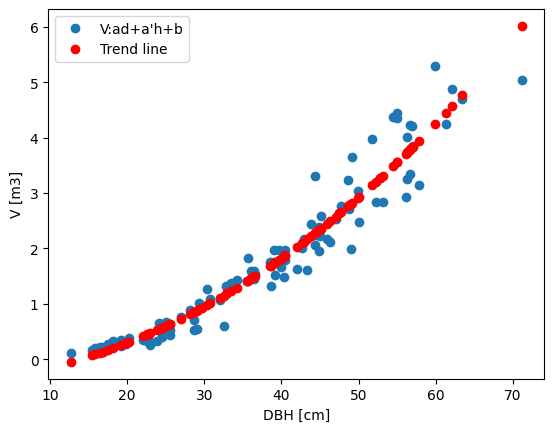

In [62]:
plt.plot(cdt['d13'], cdt['Vcdrz'], 'o', label="V:ad+a'h+b")
#plt.plot(cdt['dhwq3'], Y_pred, '-')
plt.xlabel("DBH [cm]")
plt.ylabel('V [m3]')
plt.plot(cdt['d13'],Y_pred, 'ro',label='Trend line')
#plt.plot(cdt['dhwq3'], m.exp(regress.intercept) * cdt['dhwq3'] ** regress.slope, 'r--', label='Linia trendu')
plt.legend()
plt.show()

Text(0.5, 9.444444444444438, 'Absolute error percentage [%]')

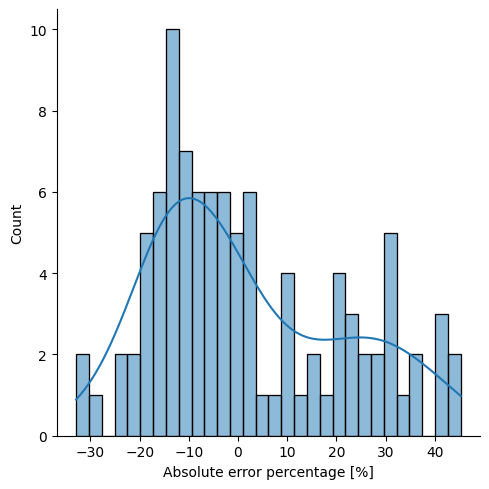

In [63]:
sns.displot(dhwq3_sum['absolute_error_percentage'], kde=True, bins = 30)
plt.xlabel('Absolute error percentage [%]')

### Seventh model: a * d2 + b * hw + c * q2 + d

In [64]:
data = pd.DataFrame(data=cdt[['d2','hw', 'q2', 'Vcdrz']])
model = ols("Vcdrz ~ d2 + hw + q2", data).fit()

print(model.summary())

print("\nRetrieving manually the parameter estimates:")
print(model._results.params)

anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)

plt.show()

                            OLS Regression Results                            
Dep. Variable:                  Vcdrz   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     529.2
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           1.02e-58
Time:                        15:21:34   Log-Likelihood:                -28.006
No. Observations:                  98   AIC:                             64.01
Df Residuals:                      94   BIC:                             74.35
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.1047      0.641     -4.847      0.0

In [65]:
Y_pred = model.params[1] * cdt['d2'] + model.params[2] * cdt['hw'] + model.params[3]* cdt['q2']  + model.params[0]
a1 = model.params[1]
a2 = model.params[2]
b = model.params[0]
u = cdt['Vcdrz'] - Y_pred
absolute_error = ae(cdt['Vcdrz'], Y_pred)
absolute_error_percentage = aep(cdt['Vcdrz'], Y_pred)
t = sp.stats.ttest_rel(Y_pred, cdt['Vcdrz'])
anova = sp.stats.f_oneway(cdt['Vcdrz'], Y_pred)
pearson = sp.stats.pearsonr(cdt['Vcdrz'], Y_pred)
r2 = pearson[0] ** 2
print('S2u = ' + str(sp.stats.variation(u)))
print('Su = ' + str(sp.stats.tstd(u)))
print('Vu = ' + str(sp.stats.tstd(u) / sp.stats.tmean(u) * 100))
print('MAPE = ' + str(mape(cdt['Vcdrz'], Y_pred)))
print('MAE = ' + str(mae(cdt['Vcdrz'], Y_pred)))
print('MAX AEP = ' + str(max(absolute_error_percentage)))
print('MIN AEP = ' + str(min(absolute_error_percentage)))
print('STD AEP = ' + str(sp.stats.tstd(absolute_error_percentage)))

S2u = -127577163927045.52
Su = 0.3236677693607207
Vu = -1.282330919726289e+16
MAPE = 0.1753803237015822
MAE = 0.23515332403323863
MAX AEP = 75.31197785108328
MIN AEP = -118.82023040753047
STD AEP = 25.469198854570074


In [66]:
dh_multi_II = {"a": model.params[3], "b": model.params[0], "a*d": model.params[1], "a*h": model.params[2], "R2": r2,
            "Pearson": pearson[0], "Pvalue": pearson[1], 'Su': sp.stats.tstd(u),
            'MAX AEP': max(absolute_error_percentage), 'MIN AEP': min(absolute_error_percentage),
            'STD AEP': sp.stats.tstd(absolute_error_percentage),
            'MAE': mae(cdt['Vcdrz'], Y_pred), 'MAPE': mape(cdt['Vcdrz'], Y_pred),
            'test-t': t.statistic, 'test-t p-value': t.pvalue,
            'anova f-stat': anova.statistic, 'anova p-value': anova.pvalue}

dh_multi_II_sum = {'predictions':Y_pred,'u':u,'absolute_error':absolute_error,'absolute_error_percentage':absolute_error_percentage}

pd.DataFrame(dh_multi_II, index=['value']).T

,value
a,2.683511e+00
b,-3.104737e+00
a*d,1.119340e-03
a*h,4.334570e-02
R2,9.440993e-01
Pearson,9.716477e-01
Pvalue,6.279698e-62
Su,3.236678e-01
MAX AEP,7.531198e+01
MIN AEP,-1.188202e+02


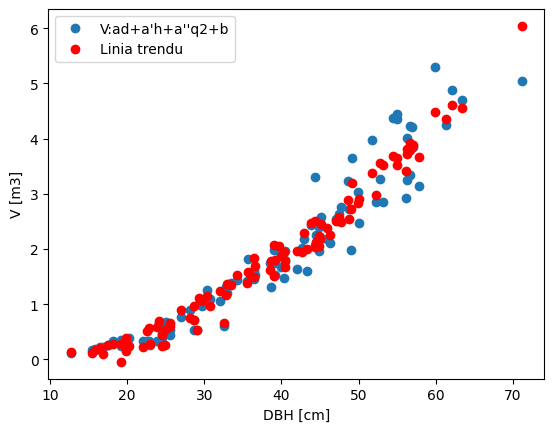

In [67]:
plt.plot(cdt['d13'], cdt['Vcdrz'], 'o', label="V:ad+a'h+a''q2+b")
#plt.plot(cdt['dhwq3'], Y_pred, '-')
plt.xlabel("DBH [cm]")
plt.ylabel('V [m3]')
plt.plot(cdt['d13'],Y_pred, 'ro',label='Linia trendu')
#plt.plot(cdt['dhwq3'], m.exp(regress.intercept) * cdt['dhwq3'] ** regress.slope, 'r--', label='Linia trendu')
plt.legend()
plt.show()

Text(0.5, 9.444444444444438, 'Absolute error percentage [%]')

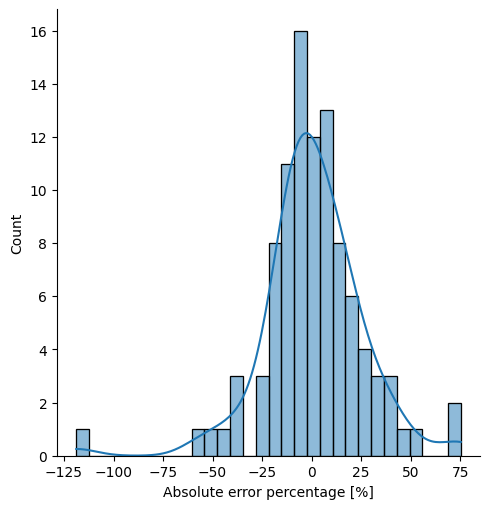

In [68]:
sns.displot(dh_multi_II_sum['absolute_error_percentage'], kde=True, bins = 30)
plt.xlabel('Absolute error percentage [%]')

### Nineth model: a * d2 + b * hw + c * q3 + d

In [69]:
data = pd.DataFrame(data=cdt[['d2' ,'hw', 'q3', 'Vcdrz']])
model = ols("Vcdrz ~ d2 + hw + q3", data).fit()

print(model.summary())

print("\nRetrieving manually the parameter estimates:")
print(model._results.params)

anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)

plt.show()

                            OLS Regression Results                            
Dep. Variable:                  Vcdrz   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     448.4
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           1.53e-55
Time:                        15:21:36   Log-Likelihood:                -35.635
No. Observations:                  98   AIC:                             79.27
Df Residuals:                      94   BIC:                             89.61
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4797      0.768     -3.227      0.0

In [70]:
Y_pred = model.params[1] * cdt['d2'] + model.params[2] * cdt['hw'] + model.params[3]* cdt['q3']  + model.params[0]
a1 = model.params[1]
a2 = model.params[2]
b = model.params[0]
u = cdt['Vcdrz'] - Y_pred
absolute_error = ae(cdt['Vcdrz'], Y_pred)
absolute_error_percentage = aep(cdt['Vcdrz'], Y_pred)
t = sp.stats.ttest_rel(Y_pred, cdt['Vcdrz'])
anova = sp.stats.f_oneway(cdt['Vcdrz'], Y_pred)
pearson = sp.stats.pearsonr(cdt['Vcdrz'], Y_pred)
r2 = pearson[0] ** 2
print('S2u = ' + str(sp.stats.variation(u)))
print('Su = ' + str(sp.stats.tstd(u)))
print('Vu = ' + str(sp.stats.tstd(u) / sp.stats.tmean(u) * 100))
print('MAPE = ' + str(mape(cdt['Vcdrz'], Y_pred)))
print('MAE = ' + str(mae(cdt['Vcdrz'], Y_pred)))
print('MAX AEP = ' + str(max(absolute_error_percentage)))
print('MIN AEP = ' + str(min(absolute_error_percentage)))
print('STD AEP = ' + str(sp.stats.tstd(absolute_error_percentage)))

S2u = 1146472275526936.2
Su = 0.34987239326360403
Vu = 1.15236677338105e+17
MAPE = 0.17468203925799264
MAE = 0.2487271188346457
MAX AEP = 57.28969112131692
MIN AEP = -73.14950712415663
STD AEP = 23.82925682590511


In [71]:
dh_multi_III = {"a": model.params[3], "b": model.params[0], "a*d": model.params[1], "a*h": model.params[2], "R2": r2,
            "Pearson": pearson[0], "Pvalue": pearson[1], 'Su': sp.stats.tstd(u),
            'MAX AEP': max(absolute_error_percentage), 'MIN AEP': min(absolute_error_percentage),
            'STD AEP': sp.stats.tstd(absolute_error_percentage),
            'MAE': mae(cdt['Vcdrz'], Y_pred), 'MAPE': mape(cdt['Vcdrz'], Y_pred),
            'test-t': t.statistic, 'test-t p-value': t.pvalue,
            'anova f-stat': anova.statistic, 'anova p-value': anova.pvalue}

dh_multi_III_sum = {'predictions':Y_pred,'u':u,'absolute_error':absolute_error,'absolute_error_percentage':absolute_error_percentage}

pd.DataFrame(dh_multi_III, index=['value']).T

,value
a,2.070718e+00
b,-2.479727e+00
a*d,1.161671e-03
a*h,2.808997e-02
R2,9.346813e-01
Pearson,9.667891e-01
Pvalue,1.111347e-58
Su,3.498724e-01
MAX AEP,5.728969e+01
MIN AEP,-7.314951e+01


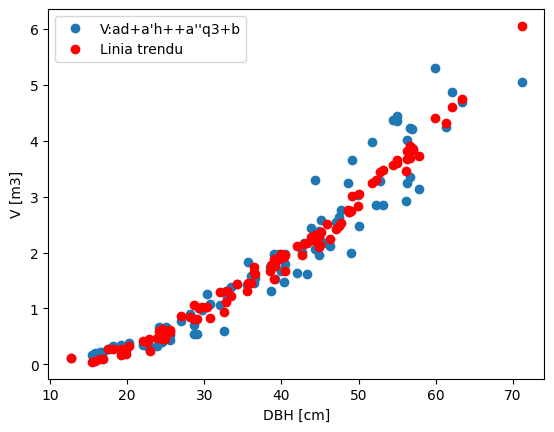

In [72]:
plt.plot(cdt['d13'], cdt['Vcdrz'], 'o', label="V:ad+a'h++a''q3+b")
#plt.plot(cdt['dhwq3'], Y_pred, '-')
plt.xlabel("DBH [cm]")
plt.ylabel('V [m3]')
plt.plot(cdt['d13'],Y_pred, 'ro',label='Linia trendu')
#plt.plot(cdt['dhwq3'], m.exp(regress.intercept) * cdt['dhwq3'] ** regress.slope, 'r--', label='Linia trendu')
plt.legend()
plt.show()

Text(0.5, 9.444444444444438, 'Absolute error percentage [%]')

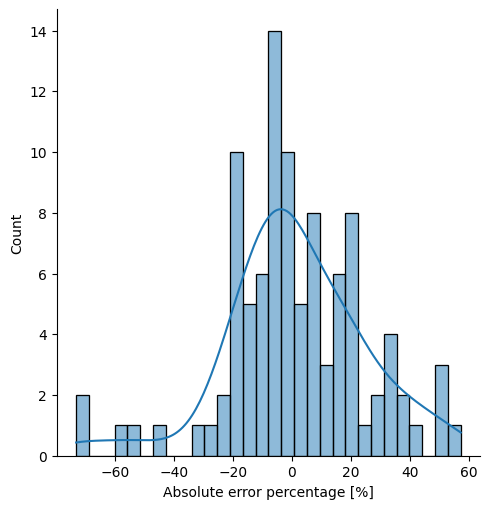

In [73]:
sns.displot(dh_multi_III_sum['absolute_error_percentage'], kde=True, bins = 30)
plt.xlabel('Absolute error percentage [%]')

<h1>Summary</h1>

Height curve:
- $hw=(\frac{d_{1.3}}{1.6815+0.1704 \cdot d_{1.3}} )^2 +1.3$

Linear regression:
- $V=1.2489 \cdot 10^{-3} \cdot {d_{1.3}}^2 - 0.1830$ - model based on breast tree | Model I
- $V=4.5549 \cdot 10^{-5} \cdot {d_{1.3}}^2 \cdot h + 0.0894$ - model based on breast tree and height | Model II

$q_2=\frac{d_{1/2h}}{d_{1.3}}$, $q_3=\frac{d_{1/3h}}{d_{1.3}}$

- $V=5.6277 \cdot 10^{-5} \cdot {d_{1.3}}^2 \cdot h \cdot q_3 + 0.0426$ - model based on breast tree, height and coefficient q3 | Model III
- $V=5.4955 \cdot 10^{-5} \cdot {d_{1.3}}^2 \cdot h \cdot q_2 + 0.1050$ - model based on breast tree, height and coefficient q2 | Model IV

Power regression:

- $V={2.1346 \cdot 10^{-5}} \cdot ({d_{1.3}}\cdot h \cdot q_3)^{1.6884}$ - model based on breast tree, height and coefficient q3 | Model V
- $V={2.3013 \cdot 10^{-5}} \cdot ({d_{1.3}}\cdot h \cdot q_2)^{1.6978}$ - model based on breast tree, height and coefficient q2 | Model VI

Multiple regression:

- $V= 0.1615 \cdot d_{1.3} - 0.2483 \cdot h + 1.2059$ - model based on breast tree and height | Model VII
- $V= 0.1569 \cdot d_{1.3} - 0.2262 \cdot h + 2.1227 \cdot q_3 - 0.9633$ - model based on breast tree, height and coefficient q3 | Model VIII
- $V= 0.1511 \cdot d_{1.3} - 0.2018 \cdot h + 2.6600 \cdot q_2 - 1.5764$ - model based on breast tree, height and coefficient q2 | Model IX

In [74]:
index = ['a*d2+b', 'a*d2h+b', 'a*d2hq3+b', 'a*d2hq2+b','b*dhq3^a','b*dhq2^a', "a*d+a'*h+b","a*d+a'*h+a''*q2+b","a*d+a'*h+a''*q3+b" ]
summary = pd.DataFrame(data=[d2, d2hw, d2hwq3, d2hwq2,dhwq3,dhwq2, dh_multi_I,dh_multi_II,dh_multi_III], index=index)
summary

,a,b,a*d,a*h,R2,Pearson,Pvalue,Su,MAX AEP,MIN AEP,STD AEP,MAE,MAPE,test-t,test-t p-value,anova f-stat,anova p-value
a*d2+b,0.001237,-0.170506,NaN,NaN,0.927269,0.962948,1.941908e-56,0.369190,90.127608,-73.704239,24.979423,0.254213,0.181498,-4.040161e-15,1.000000,6.418640e-31,1.000000
a*d2h+b,0.000044,0.098843,NaN,NaN,0.923296,0.960883,2.499808e-55,0.379140,99.493065,-33.241636,25.938706,0.263636,0.196229,2.336816e-15,1.000000,4.153935e-31,1.000000
a*d2hq3+b,0.000056,0.040180,NaN,NaN,0.987294,0.993627,8.019678e-93,0.154308,33.453767,-16.476182,9.562011,0.102598,0.070825,-7.267899e-16,1.000000,3.025929e-32,1.000000
a*d2hq2+b,0.000055,0.113619,NaN,NaN,0.938875,0.968956,4.588337e-60,0.338455,95.296423,-27.358674,25.737798,0.236493,0.191166,-6.825957e-15,1.000000,1.863113e-30,1.000000
b*dhq3^a,1.68597,0.000022,NaN,NaN,0.927461,0.963048,1.710891e-56,0.372834,45.294904,-32.909013,19.491674,0.259687,0.158953,-5.100804e-01,0.611154,9.615862e-03,0.921985
b*dhq2^a,1.697192,0.000023,NaN,NaN,0.935207,0.967061,7.540226e-59,0.358952,57.193750,-32.317176,17.933776,0.231294,0.137453,-1.821023e-01,0.855882,1.106296e-03,0.973501
a*d+a'*h+b,NaN,-0.407294,0.001194,0.013804,0.927498,0.963067,1.669354e-56,0.368610,92.788716,-141.960230,29.490666,0.255715,0.198695,-4.685451e-15,1.000000,1.234550e-30,1.000000
a*d+a'*h+a''*q2+b,2.683511,-3.104737,0.001119,0.043346,0.944099,0.971648,6.279698e-62,0.323668,75.311978,-118.820230,25.469199,0.235153,0.175380,7.719922e-14,1.000000,1.814625e-28,1.000000
a*d+a'*h+a''*q3+b,2.070718,-2.479727,0.001162,0.02809,0.934681,0.966789,1.111347e-58,0.349872,57.289691,-73.149507,23.829257,0.248727,0.174682,-8.590577e-15,1.000000,2.650866e-30,1.000000


In [75]:
d2_sum = pd.DataFrame(d2_sum)
d2hw_sum = pd.DataFrame(d2hw_sum)
d2hwq3_sum = pd.DataFrame(d2hwq3_sum)
d2hwq2_sum = pd.DataFrame(d2hwq2_sum)
dhwq3_sum = pd.DataFrame(dhwq3_sum)
dhwq2_sum = pd.DataFrame(dhwq2_sum)
dh_multi_I_sum = pd.DataFrame(dh_multi_I_sum)
dh_multi_II_sum = pd.DataFrame(dh_multi_II_sum)
dh_multi_III_sum = pd.DataFrame(dh_multi_III_sum)

Text(0, 0.5, 'Percentage error [%]')

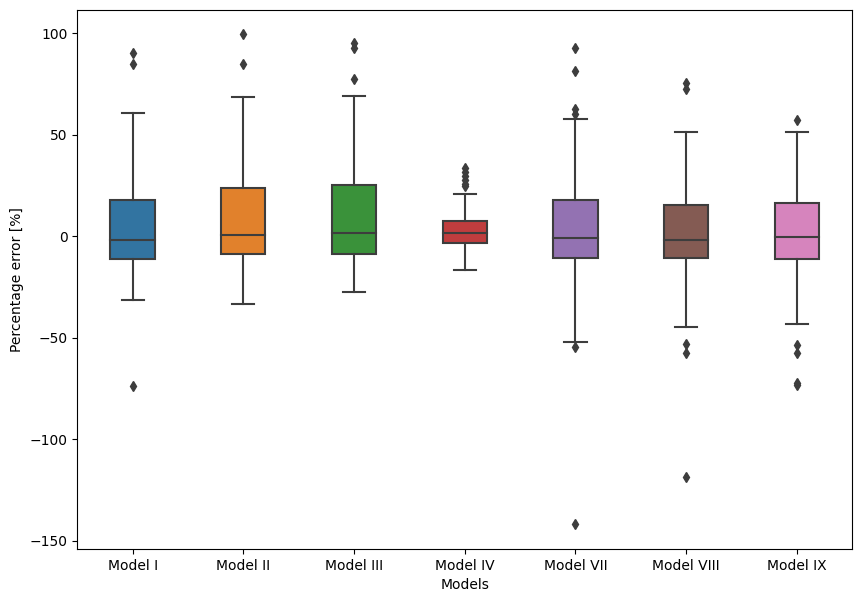

In [76]:
index_plot = ['Model I', 'Model II', 'Model III', 'Model IV','Model VII','Model VIII','Model IX']

box_plot_data = pd.DataFrame(data=[d2_sum['absolute_error_percentage'],d2hw_sum['absolute_error_percentage'],
                        d2hwq2_sum['absolute_error_percentage'],d2hwq3_sum['absolute_error_percentage'],
                        dh_multi_I_sum['absolute_error_percentage'],dh_multi_II_sum['absolute_error_percentage'],
                        dh_multi_III_sum['absolute_error_percentage']
                        ], index=index_plot).T


plt.figure(figsize=(10, 7))
sns.boxplot(data=box_plot_data,width=0.4)
plt.xlabel('Models')
plt.ylabel('Percentage error [%]')
#plt.grid(which='both', linestyle='--',linewidth=0.5)

<Axes: xlabel='Absolute error [m3]', ylabel='Count'>

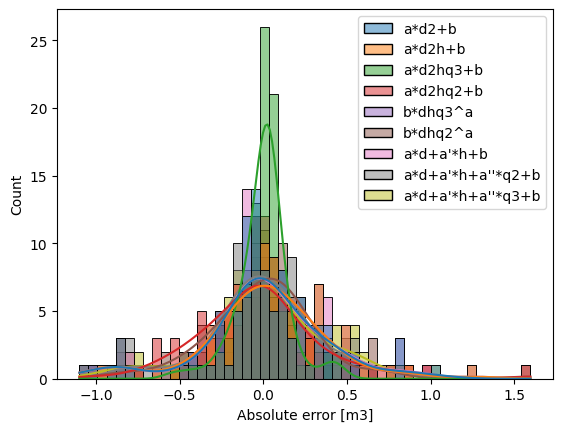

In [77]:
index_plot = ['a*d2+b', 'a*d2h+b', 'a*d2hq3+b', 'a*d2hq2+b','b*dhq3^a','b*dhq2^a', "a*d+a'*h+b"
              ,"a*d+a'*h+a''*q2+b","a*d+a'*h+a''*q3+b"
              ]


box_plot_data = pd.DataFrame(data=[d2_sum['absolute_error'],d2hw_sum['absolute_error'],d2hwq3_sum['absolute_error'],
                                 dhwq3_sum['absolute_error'],d2hw_sum['absolute_error'],
                                 d2hwq2_sum['absolute_error'],dh_multi_I_sum['absolute_error']
                                   ,dh_multi_II_sum['absolute_error'],dh_multi_III_sum['absolute_error']
                                   ], index=index_plot).T

plt.xlabel('Absolute error [m3]')
plt.ylabel('Count')
sns.histplot(data=box_plot_data,kde=True,bins=50)

In [78]:
def hundret(name):
    lista = []
    while len(lista) < 98:
        lista.append(name)
    
    return lista

In [79]:
real_ = hundret('real')
d2__ = hundret('a*d2+b')
d2h_ = hundret('a*d2h+b')
d2hq3_ = hundret('a*d2hq3+b')
d2hq2_ = hundret('a*d2hq2+b')
d_mul = hundret("a*d+a'*h+b")
d_mul_I = hundret("a*d+a'*h+a''*q+b")

In [80]:

real = pd.DataFrame({'V':cdt['Vcdrz'],'d13':cdt['d13'],'label':real_})
d2_ = pd.DataFrame({'V':d2_sum['predictions'],'u':d2_sum['u'],'d13':cdt['d13'],'label':d2__})
d2h = pd.DataFrame({'V':d2hw_sum['predictions'],'u':d2hw_sum['u'],'d13':cdt['d13'],'label':d2h_})
d2hq3 = pd.DataFrame({'V':d2hwq3_sum['predictions'],'u':d2hwq3_sum['u'],'d13':cdt['d13'],'label':d2hq3_})
d2hq2 = pd.DataFrame({'V':d2hwq2_sum['predictions'],'u':d2hwq2_sum['u'],'d13':cdt['d13'],'label':d2hq2_})
dh_mlt = pd.DataFrame({'V':dh_multi_I_sum['predictions'],'u':dh_multi_I_sum['u'],'d13':cdt['d13'],'label':d_mul})
dh_mlt_I = pd.DataFrame({'V':dh_multi_II_sum['predictions'],'u':dh_multi_II_sum['u'],'d13':cdt['d13'],'label':d_mul})
dh_mlt_II = pd.DataFrame({'V':dh_multi_III_sum['predictions'],'u':dh_multi_III_sum['u'],'d13':cdt['d13'],'label':d_mul})

index = np.linspace(0,899,900)

concat = pd.concat([real,d2_,d2h,d2hq3,d2hq2,dh_mlt,dh_mlt_I,dh_mlt_II],ignore_index=True)
concat = pd.DataFrame(concat)

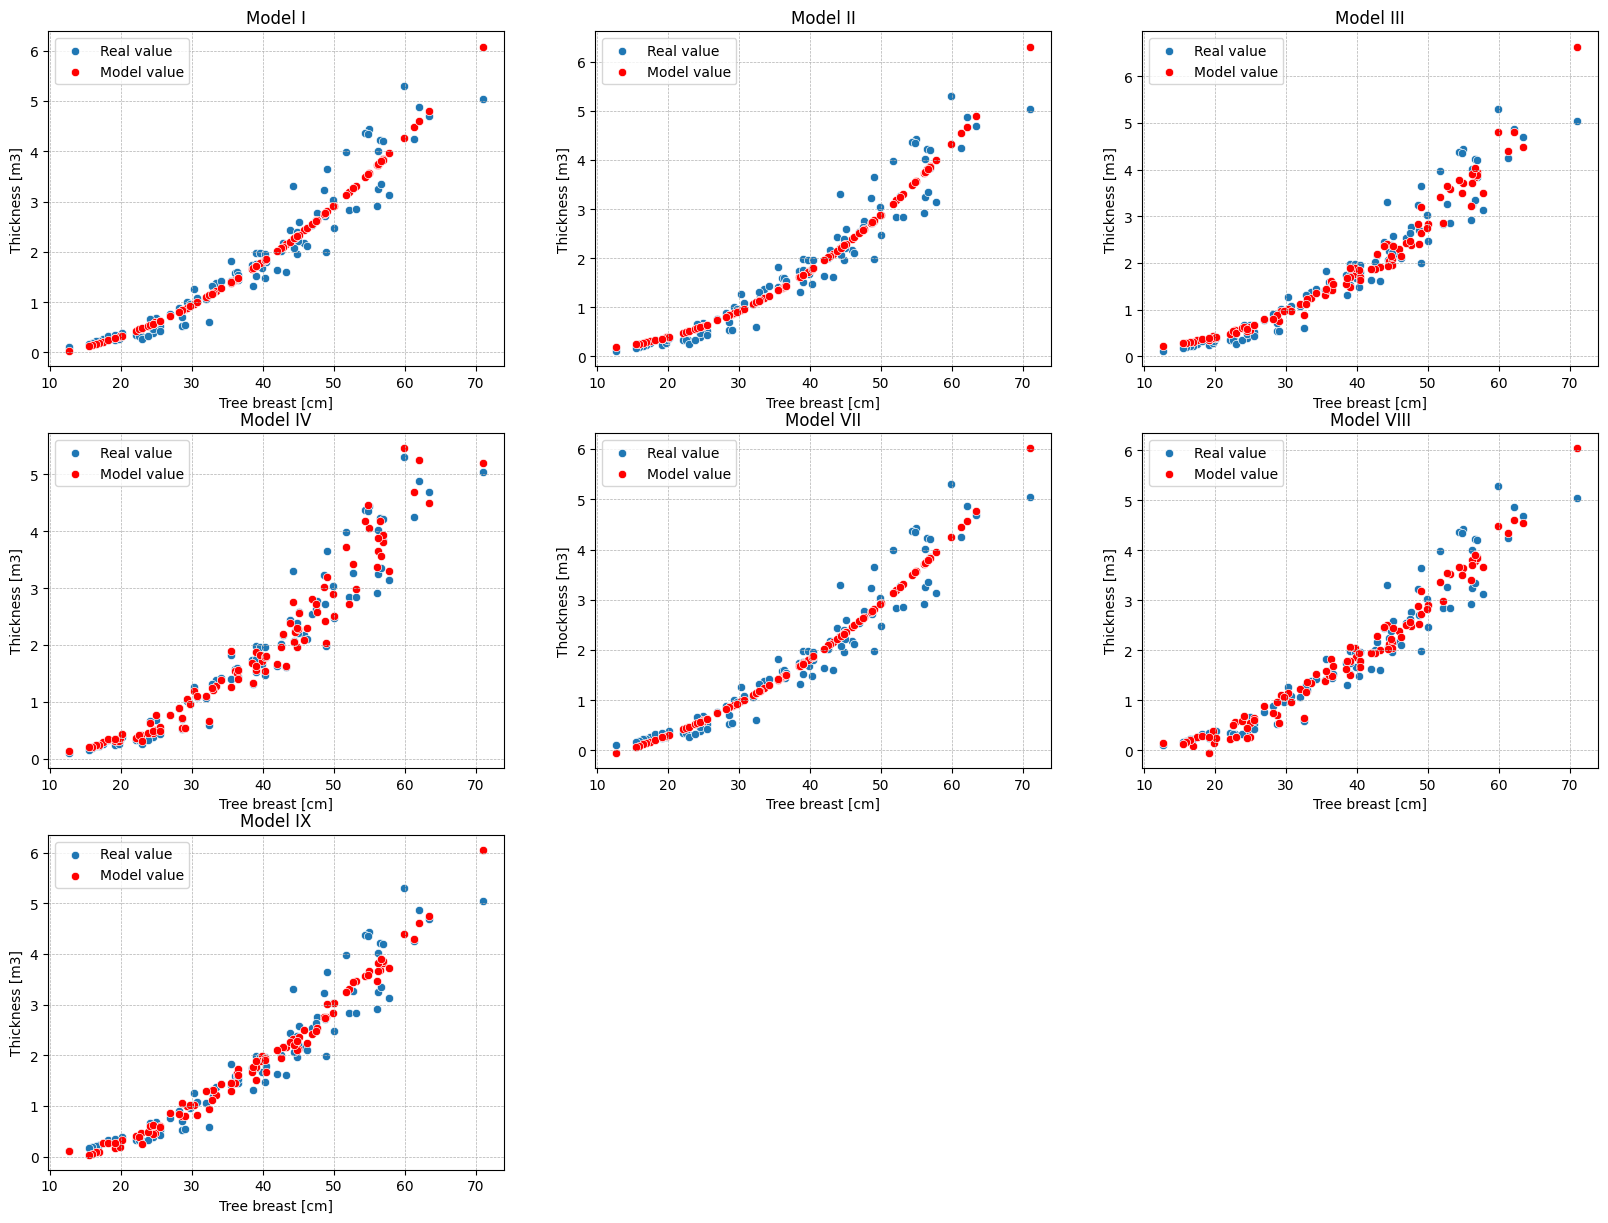

In [81]:
plt.figure(figsize=[20,20])
plt.subplot(4,3,1)
sns.scatterplot(x=real['d13'], y=real['V'], label='Real value')
sns.scatterplot(x=real['d13'], y=d2_['V'], color='red', label='Model value')
plt.grid(which='both', linestyle='--',linewidth=0.5)
plt.xlabel('Tree breast [cm]')
plt.ylabel('Thickness [m3]')
plt.title('Model I')
plt.legend()

plt.subplot(4,3,2)
sns.scatterplot(x=real['d13'], y=real['V'], label='Real value')
sns.scatterplot(x=real['d13'], y=d2h['V'], color='red', label='Model value')
plt.grid(which='both', linestyle='--',linewidth=0.5)
plt.xlabel('Tree breast [cm]')
plt.ylabel('Thickness [m3]')
plt.title('Model II')
plt.legend()

plt.subplot(4,3,3)
sns.scatterplot(x=real['d13'], y=real['V'], label='Real value')
sns.scatterplot(x=real['d13'], y=d2hq2['V'], color='red', label='Model value')
plt.grid(which='both', linestyle='--',linewidth=0.5)
plt.xlabel('Tree breast [cm]')
plt.ylabel('Thickness [m3]')
plt.title('Model III')
plt.legend()

plt.subplot(4,3,4)
sns.scatterplot(x=real['d13'], y=real['V'], label='Real value')
sns.scatterplot(x=real['d13'], y=d2hq3['V'], color='red', label='Model value')
plt.grid(which='both', linestyle='--',linewidth=0.5)
plt.xlabel('Tree breast [cm]')
plt.ylabel('Thickness [m3]')
plt.title('Model IV')
plt.legend()

plt.subplot(4,3,5)
sns.scatterplot(x=real['d13'], y=real['V'], label='Real value')
sns.scatterplot(x=real['d13'], y=dh_mlt['V'], color='red', label='Model value')
plt.grid(which='both', linestyle='--',linewidth=0.5)
plt.xlabel('Tree breast [cm]')
plt.ylabel('Thockness [m3]')
plt.title('Model VII')
plt.legend()

plt.subplot(4,3,6)
sns.scatterplot(x=real['d13'], y=real['V'], label='Real value')
sns.scatterplot(x=real['d13'], y=dh_mlt_I['V'], color='red', label='Model value')
plt.grid(which='both', linestyle='--',linewidth=0.5)
plt.xlabel('Tree breast [cm]')
plt.ylabel('Thickness [m3]')
plt.title('Model VIII')
plt.legend()

plt.subplot(4,3,7)
sns.scatterplot(x=real['d13'], y=real['V'], label='Real value')
sns.scatterplot(x=real['d13'], y=dh_mlt_II['V'], color='red', label='Model value')
plt.grid(which='both', linestyle='--',linewidth=0.5)
plt.xlabel('Tree breast [cm]')
plt.ylabel('Thickness [m3]')
plt.title('Model IX')
plt.legend()

Text(0.5, 1.0, 'Model IX')

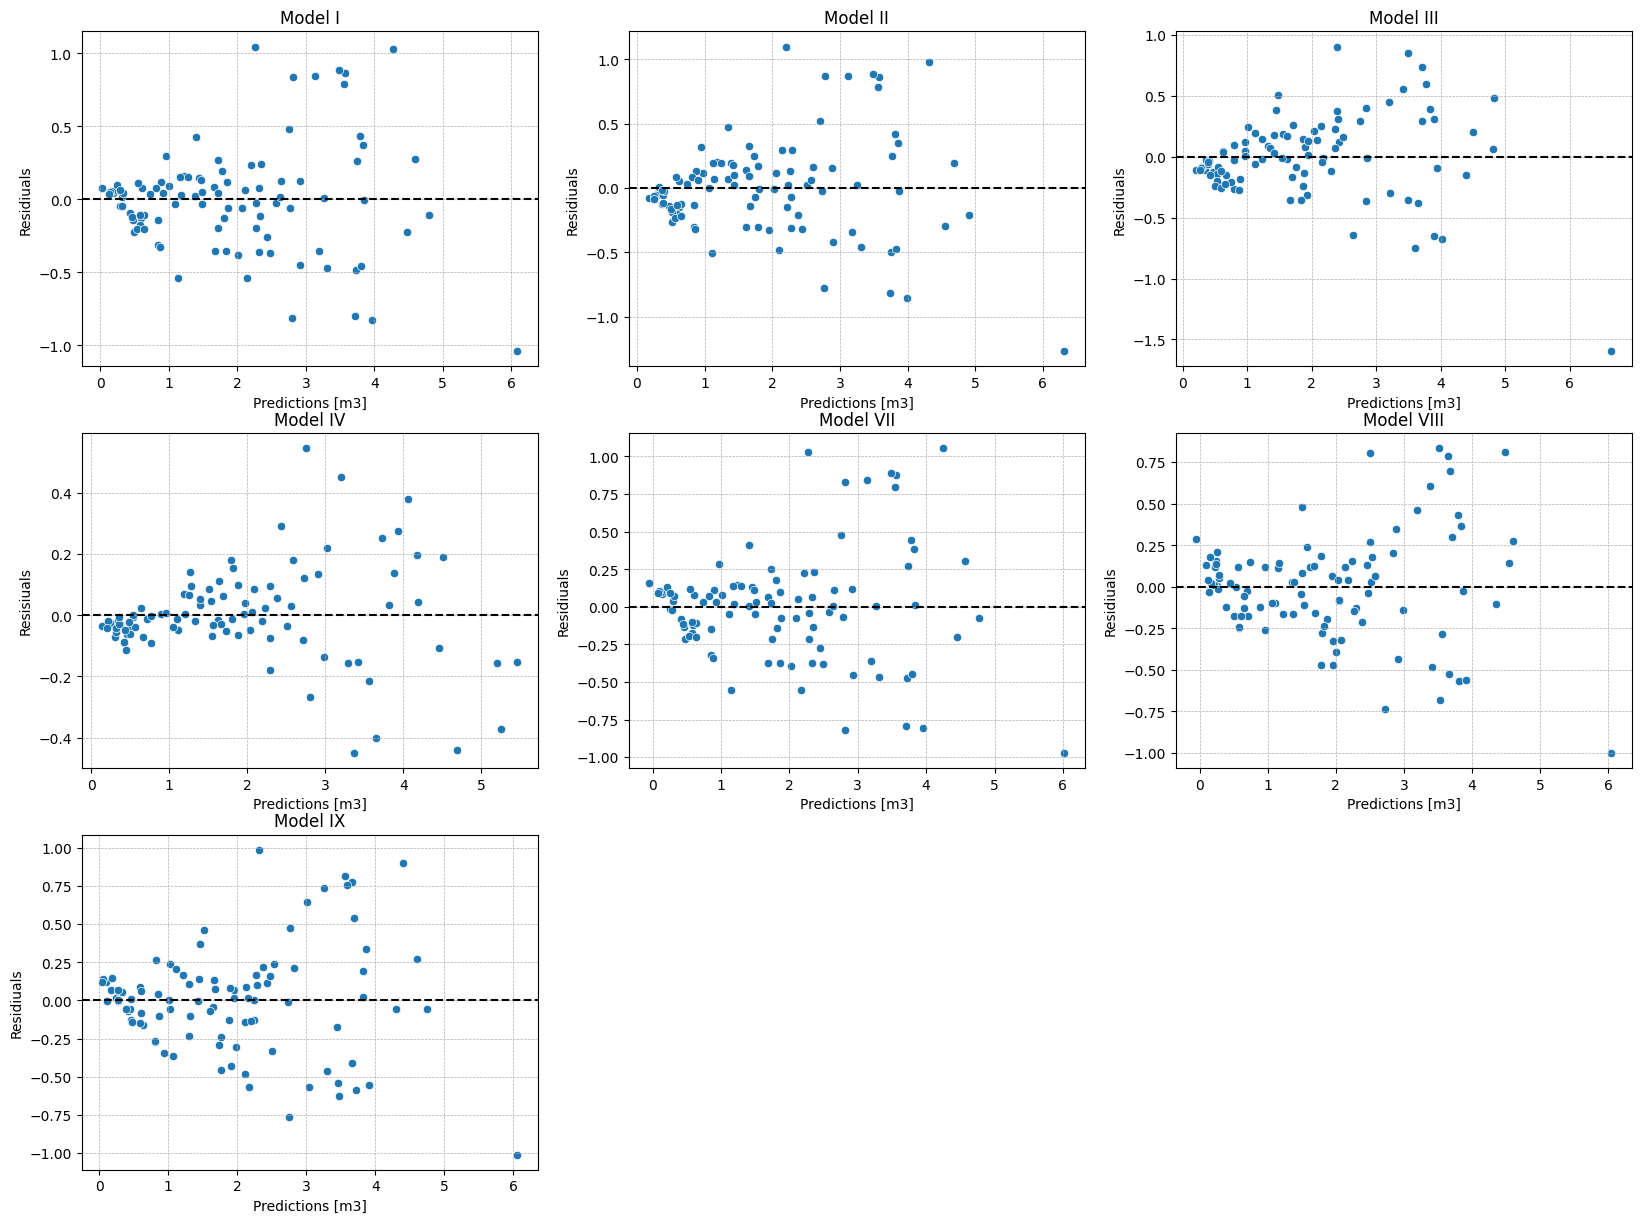

In [82]:
plt.figure(figsize=[20,20])
plt.subplot(4,3,1)
sns.scatterplot(x=d2_['V'], y=d2_['u'])
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel('Predictions [m3]')
plt.ylabel('Residiuals')
plt.grid(which='both', linestyle='--',linewidth=0.5)
plt.title('Model I')

plt.subplot(4,3,2)
sns.scatterplot(x=d2h['V'], y=d2h['u'])
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel('Predictions [m3]')
plt.ylabel('Residiuals')
plt.grid(which='both', linestyle='--',linewidth=0.5)
plt.title('Model II')

plt.subplot(4,3,3)
sns.scatterplot(x=d2hq2['V'], y=d2hq2['u'])
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel('Predictions [m3]')
plt.ylabel('Residiuals')
plt.grid(which='both', linestyle='--',linewidth=0.5)
plt.title('Model III')

plt.subplot(4,3,4)
sns.scatterplot(x=d2hq3['V'], y=d2hq3['u'])
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel('Predictions [m3]')
plt.ylabel('Resisiuals')
plt.grid(which='both', linestyle='--',linewidth=0.5)
plt.title('Model IV')

plt.subplot(4,3,5)
sns.scatterplot(x=dh_mlt['V'], y=dh_mlt['u'])
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel('Predictions [m3]')
plt.ylabel('Residiuals')
plt.grid(which='both', linestyle='--',linewidth=0.5)
plt.title('Model VII')

plt.subplot(4,3,6)
sns.scatterplot(x=dh_mlt_I['V'], y=dh_mlt_I['u'])
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel('Predictions [m3]')
plt.ylabel('Residiuals')
plt.grid(which='both', linestyle='--',linewidth=0.5)
plt.title('Model VIII')

plt.subplot(4,3,7)
sns.scatterplot(x=dh_mlt_II['V'], y=dh_mlt_II['u'])
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel('Predictions [m3]')
plt.ylabel('Residiuals')
plt.grid(which='both', linestyle='--',linewidth=0.5)
plt.title('Model IX')